In [5]:
import numpy as np

def pca_manual(X, k=2):
    # 1. Centering
    X_centered = X - np.mean(X, axis=0)

    # 2. Covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # 3. Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # 4. Sort eigenvalues and eigenvectors
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    # 5. Select top-k
    components = eigenvectors[:, :k]

    # 6. Project data
    X_pca = X_centered @ components

    return X_pca, components, eigenvalues[:k]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
X = load_iris().data

# PCA với scikit-learn
pca_sklearn = PCA(n_components=2)
X_sklearn = pca_sklearn.fit_transform(X)

X_manual, manual_components, eigen = pca_manual(X, k=2)



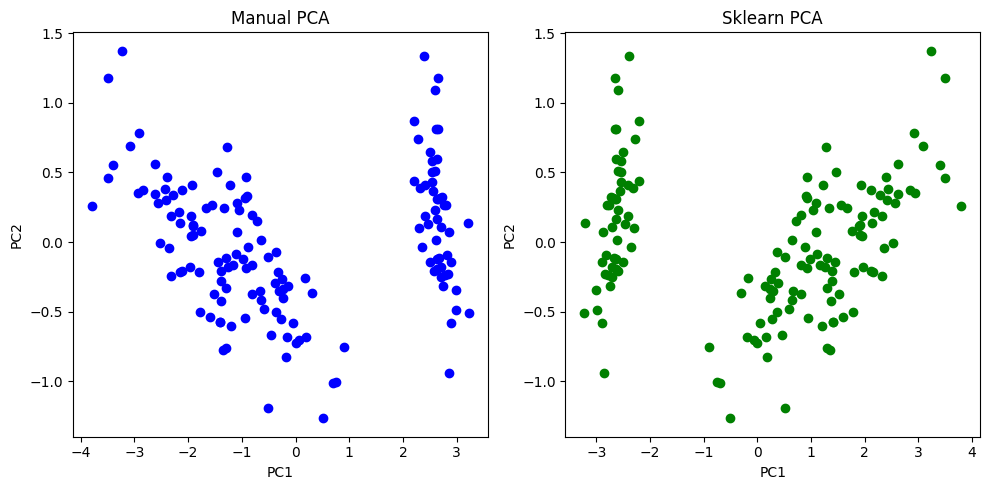

In [8]:
plt.figure(figsize=(10, 5))

# Thủ công
plt.subplot(1, 2, 1)
plt.scatter(X_manual[:, 0], X_manual[:, 1], c='blue', label="Manual PCA")
plt.title("Manual PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Thư viện
plt.subplot(1, 2, 2)
plt.scatter(X_sklearn[:, 0], X_sklearn[:, 1], c='green', label="Sklearn PCA")
plt.title("Sklearn PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()
